# Predicting heart disease using Machine Learning approach

**Focus** - To build a machine learning model that will predict with maximum accuracy whether or not an individual is suffering from a heart disease based on some medical data.

**Approach**

1. Problem definition
 - Given the clinical parameters about a patient, is it possible to predict if they have a heart disease?
2. Data
 - Obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease)
 - Also available at [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)
3. Evaluation
 - Try reaching maximum accuracy during the proof of concept
4. Features
 - 
5. Modelling
6. Experimentation



**Importing the tools we will need for `exploratory data analysis`**


In [1]:
# importing the standard libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models from sci-kit learn for machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# for model evaluations

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

**Loading the data**

In [7]:
hd = pd.read_csv("https://raw.githubusercontent.com/ineelhere/Machine-Learning-and-Data-Science/master/Milestone%20Project%201/data/heart-disease.csv")
hd #just to check if the data has been properly imported

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Exploring the imported data**

In [10]:
#first 5 rows of the dataset
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
#last 5 rows of the dataset
hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
# shape (rows,columns) of the dataset
hd.shape

(303, 14)

In [16]:
# number of classes in particular column - counting the values
hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

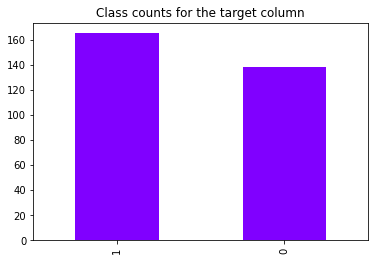

In [39]:
# visualizing the above
hd.target.value_counts().plot.bar(colormap='rainbow', title='Class counts for the target column');